In [1]:
import pandas as pd
import numpy as np

# disable warnings
import warnings
warnings.filterwarnings('ignore')

In [72]:
data = pd.read_csv("../raw_data/Bakery_sales.csv")

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        234005 non-null  object 
 1   time        234005 non-null  object 
 2   order_ID    234005 non-null  int64  
 3   product     234005 non-null  object 
 4   quantity    234005 non-null  int64  
 5   unit_price  234005 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 10.7+ MB


In [73]:
data

,date,time,order_ID,product,quantity,unit_price
0,2021-01-02,08:38,150040,BAGUETTE,1,0.90
1,2021-01-02,08:38,150040,PAIN AU CHOCOLAT,3,1.20
2,2021-01-02,09:14,150041,PAIN AU CHOCOLAT,2,1.20
3,2021-01-02,09:14,150041,PAIN,1,1.15
4,2021-01-02,09:25,150042,TRADITIONAL BAGUETTE,5,1.20
...,...,...,...,...,...,...
234000,2022-09-30,18:52,288911,COUPE,1,0.15
234001,2022-09-30,18:52,288911,BOULE 200G,1,1.20
234002,2022-09-30,18:52,288911,COUPE,2,0.15
234003,2022-09-30,18:55,288912,TRADITIONAL BAGUETTE,1,1.30


In [74]:
data.drop(data[data['product'] == "."].index, inplace=True)

In [75]:
data

,date,time,order_ID,product,quantity,unit_price
0,2021-01-02,08:38,150040,BAGUETTE,1,0.90
1,2021-01-02,08:38,150040,PAIN AU CHOCOLAT,3,1.20
2,2021-01-02,09:14,150041,PAIN AU CHOCOLAT,2,1.20
3,2021-01-02,09:14,150041,PAIN,1,1.15
4,2021-01-02,09:25,150042,TRADITIONAL BAGUETTE,5,1.20
...,...,...,...,...,...,...
234000,2022-09-30,18:52,288911,COUPE,1,0.15
234001,2022-09-30,18:52,288911,BOULE 200G,1,1.20
234002,2022-09-30,18:52,288911,COUPE,2,0.15
234003,2022-09-30,18:55,288912,TRADITIONAL BAGUETTE,1,1.30


<AxesSubplot: title={'center': 'unit_price'}, xlabel='product'>

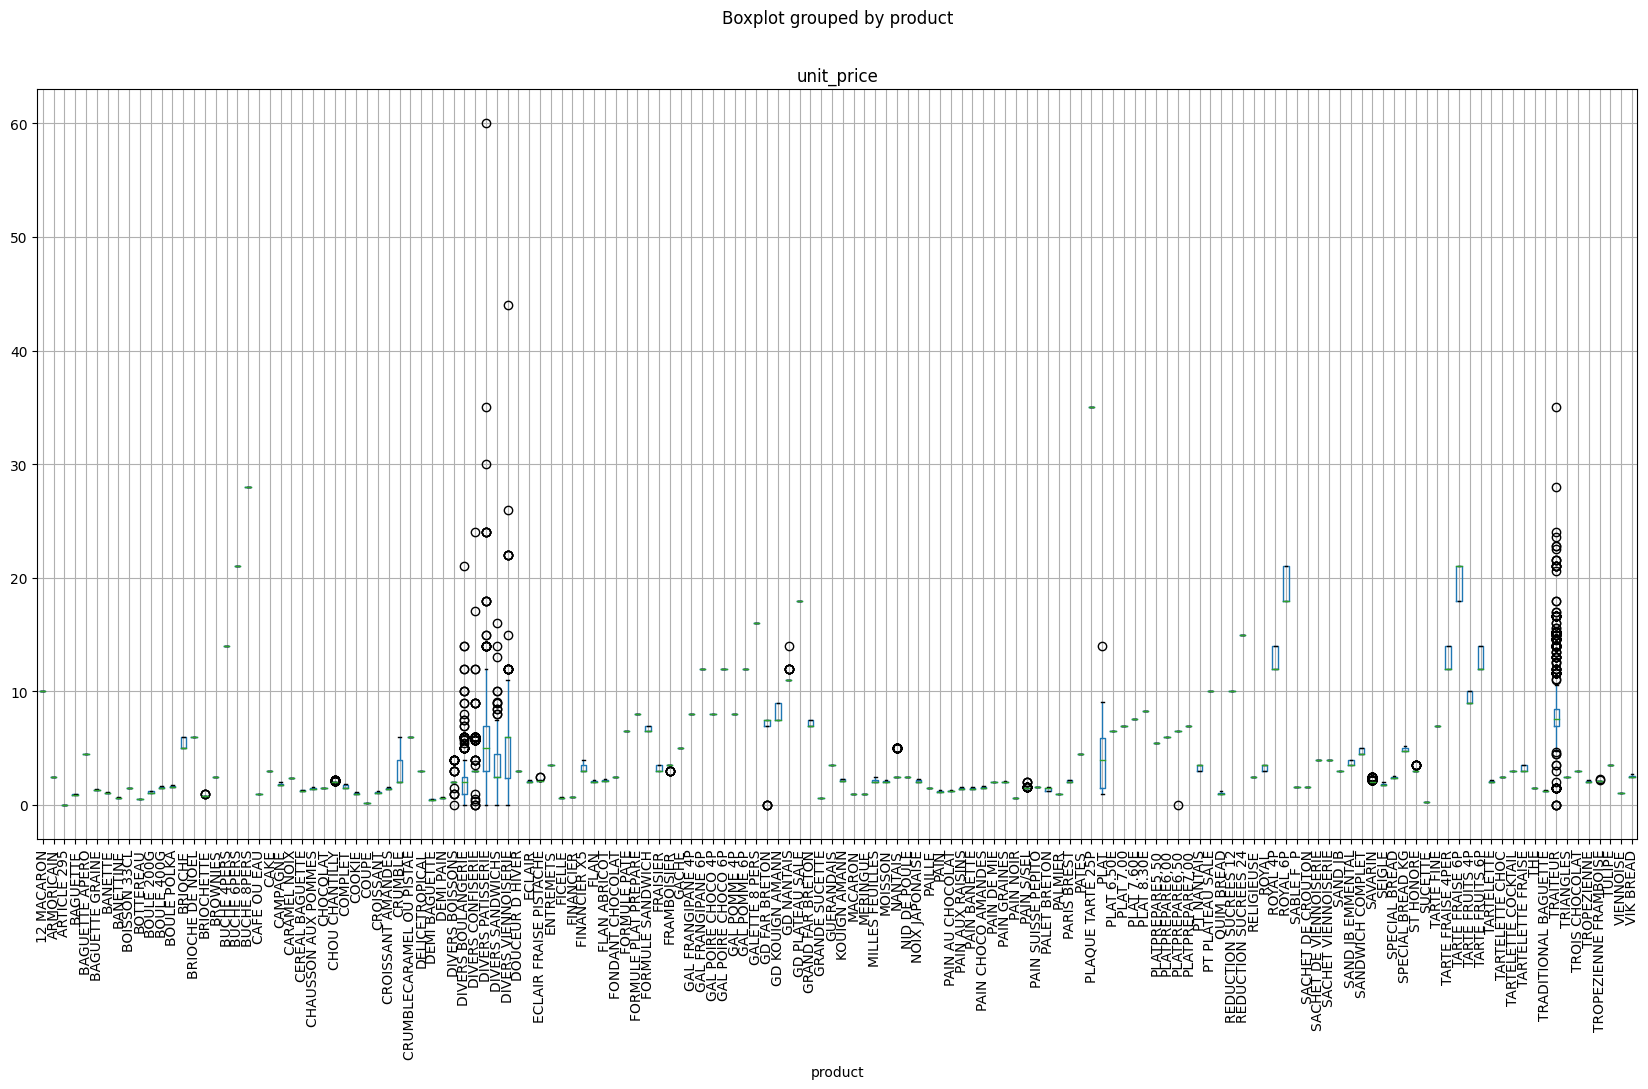

In [76]:
# draw a boxplot for each product to see the distribution of prices using the most popular price
data.boxplot(column='unit_price', by='product', figsize=(20, 10), rot=90)

In [78]:
data.drop(data[data['unit_price'] == 0].index, inplace=True)

In [79]:
divers = data[data['product'].str.contains("DIVERS")]
traiteur = data[data['product'] == "TRAITEUR"]

In [80]:
divers.shape

(2432, 6)

In [81]:
traiteur.shape

(1305, 6)

In [82]:
data.drop(data[data['product'].str.contains("DIVERS")].index, inplace=True)
data.drop(data[data['product'] == "TRAITEUR"].index, inplace=True)

<AxesSubplot: title={'center': 'unit_price'}, xlabel='product'>

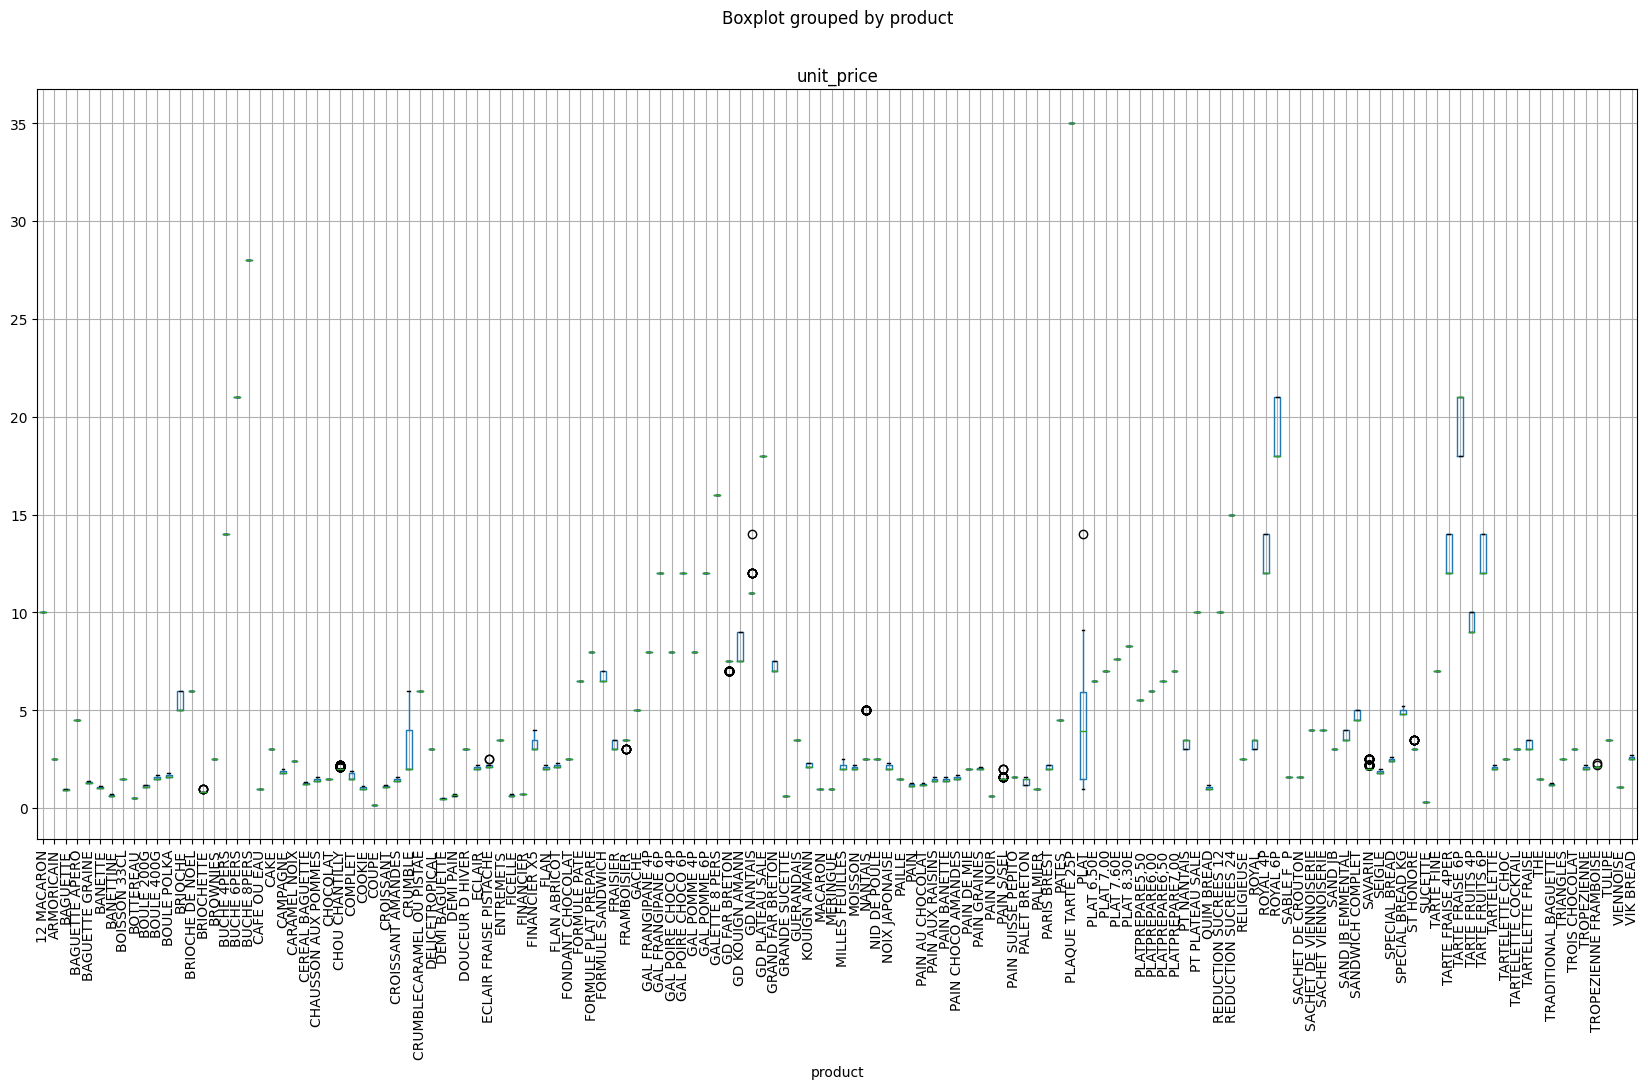

In [83]:
data.boxplot(column='unit_price', by='product', figsize=(20, 10), rot=90)

In [84]:
data

,date,time,order_ID,product,quantity,unit_price
0,2021-01-02,08:38,150040,BAGUETTE,1,0.90
1,2021-01-02,08:38,150040,PAIN AU CHOCOLAT,3,1.20
2,2021-01-02,09:14,150041,PAIN AU CHOCOLAT,2,1.20
3,2021-01-02,09:14,150041,PAIN,1,1.15
4,2021-01-02,09:25,150042,TRADITIONAL BAGUETTE,5,1.20
...,...,...,...,...,...,...
234000,2022-09-30,18:52,288911,COUPE,1,0.15
234001,2022-09-30,18:52,288911,BOULE 200G,1,1.20
234002,2022-09-30,18:52,288911,COUPE,2,0.15
234003,2022-09-30,18:55,288912,TRADITIONAL BAGUETTE,1,1.30


In [89]:
most_popular_prices = data.groupby('product')['unit_price'].agg(lambda x: x.value_counts().index[0])
# make a dictionary with the most popular price for each product
most_popular_prices.to_dict()


{'12 MACARON': 10.0,
 'ARMORICAIN': 2.5,
 'BAGUETTE': 0.9,
 'BAGUETTE APERO': 4.5,
 'BAGUETTE GRAINE': 1.3,
 'BANETTE': 1.05,
 'BANETTINE': 0.6,
 'BOISSON 33CL': 1.5,
 'BOTTEREAU': 0.5,
 'BOULE 200G': 1.1,
 'BOULE 400G': 1.5,
 'BOULE POLKA': 1.6,
 'BRIOCHE': 5.0,
 'BRIOCHE DE NOEL': 6.0,
 'BRIOCHETTE': 0.8,
 'BROWNIES': 2.5,
 'BUCHE 4PERS': 14.0,
 'BUCHE 6PERS': 21.0,
 'BUCHE 8PERS': 28.0,
 'CAFE OU EAU': 1.0,
 'CAKE': 3.0,
 'CAMPAGNE': 1.8,
 'CARAMEL NOIX': 2.4,
 'CEREAL BAGUETTE': 1.25,
 'CHAUSSON AUX POMMES': 1.4,
 'CHOCOLAT': 1.5,
 'CHOU CHANTILLY': 2.0,
 'COMPLET': 1.5,
 'COOKIE': 1.0,
 'COUPE': 0.15,
 'CROISSANT': 1.1,
 'CROISSANT AMANDES': 1.4,
 'CRUMBLE': 2.0,
 'CRUMBLECARAMEL OU PISTAE': 6.0,
 'DELICETROPICAL': 3.0,
 'DEMI BAGUETTE': 0.45,
 'DEMI PAIN': 0.65,
 'DOUCEUR D HIVER': 3.0,
 'ECLAIR': 2.0,
 'ECLAIR FRAISE PISTACHE': 2.1,
 'ENTREMETS': 3.5,
 'FICELLE': 0.6,
 'FINANCIER': 0.7,
 'FINANCIER X5': 3.0,
 'FLAN': 2.0,
 'FLAN ABRICOT': 2.1,
 'FONDANT CHOCOLAT': 2.5,
 'FORMULE

In [105]:
orders = data.groupby(['order_ID', 'date', 'time'])['product', 'quantity', 'unit_price'].apply(lambda x: x.to_dict(orient='list')).to_dict()
orders

C:\Users\yaroslav\AppData\Local\Temp\ipykernel_5492\3736756534.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  orders = data.groupby(['order_ID', 'date', 'time'])['product', 'quantity', 'unit_price'].apply(lambda x: x.to_dict(orient='list')).to_dict()


In [106]:
len(orders)

135750

In [130]:
# make a histogram of sales per day using hours
data['date_time'] = pd.to_datetime(data['date'] + ' ' + data['time'])
data['hour'] = data['date_time'].dt.hour
data['day'] = data['date_time'].dt.day
data['month'] = data['date_time'].dt.month
data['year'] = data['date_time'].dt.year
data['weekday'] = data['date_time'].dt.weekday


In [137]:
data

,date,time,order_ID,product,quantity,unit_price,date_time,hour,day,month,year,weekday
0,2021-01-02,08:38,150040,BAGUETTE,1,0.90,2021-01-02 08:38:00,8,2,1,2021,5
1,2021-01-02,08:38,150040,PAIN AU CHOCOLAT,3,1.20,2021-01-02 08:38:00,8,2,1,2021,5
2,2021-01-02,09:14,150041,PAIN AU CHOCOLAT,2,1.20,2021-01-02 09:14:00,9,2,1,2021,5
3,2021-01-02,09:14,150041,PAIN,1,1.15,2021-01-02 09:14:00,9,2,1,2021,5
4,2021-01-02,09:25,150042,TRADITIONAL BAGUETTE,5,1.20,2021-01-02 09:25:00,9,2,1,2021,5
...,...,...,...,...,...,...,...,...,...,...,...,...
234000,2022-09-30,18:52,288911,COUPE,1,0.15,2022-09-30 18:52:00,18,30,9,2022,4
234001,2022-09-30,18:52,288911,BOULE 200G,1,1.20,2022-09-30 18:52:00,18,30,9,2022,4
234002,2022-09-30,18:52,288911,COUPE,2,0.15,2022-09-30 18:52:00,18,30,9,2022,4
234003,2022-09-30,18:55,288912,TRADITIONAL BAGUETTE,1,1.30,2022-09-30 18:55:00,18,30,9,2022,4


<AxesSubplot: xlabel='Час', ylabel='Заказы'>

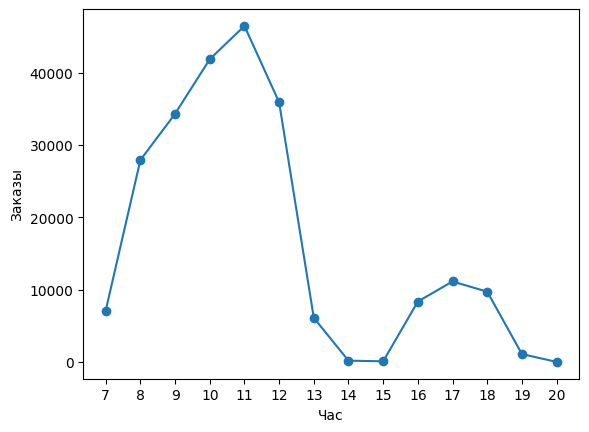

In [149]:
# нарисуй график продаж в день по часам, используя "o" для маркеров и закрась площадь под графиком
data.groupby('hour')['order_ID'].count().plot(kind='line', marker='o', xlabel='Час', ylabel='Заказы', xticks=range(7, 21))

<AxesSubplot: xlabel='День недели', ylabel='Заказы'>

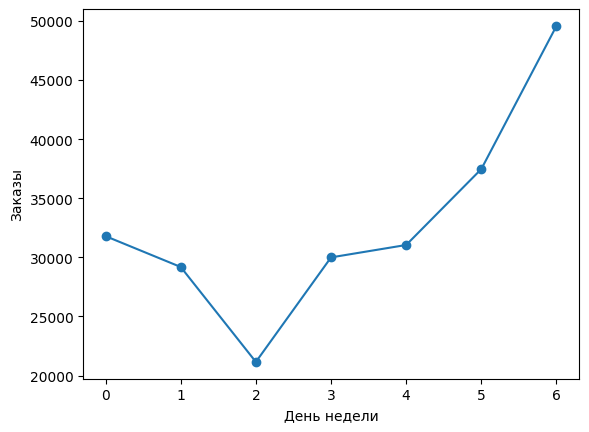

In [134]:
# заменить цифры на названия дней недели
data.groupby('weekday')['order_ID'].count().plot(kind='line', marker='o', xlabel='День недели', ylabel='Заказы', style={'xticklabels': ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']})

<AxesSubplot: xlabel='Месяц', ylabel='Заказы'>

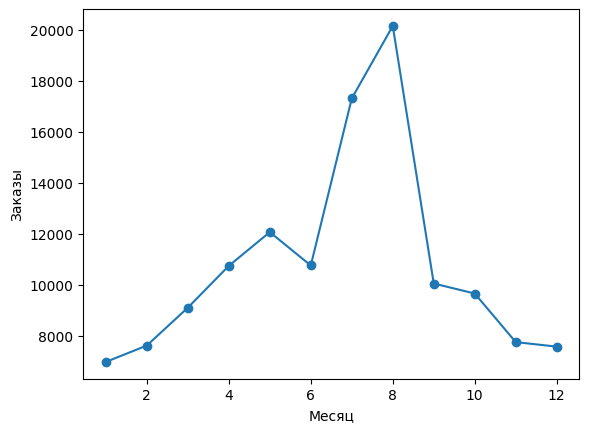

In [140]:
# from 0 to 132027
data[data.index <= 132027].groupby('month')['order_ID'].count().plot(kind='line', marker='o', xlabel='Месяц', ylabel='Заказы')

<AxesSubplot: xlabel='Месяц', ylabel='Заказы'>

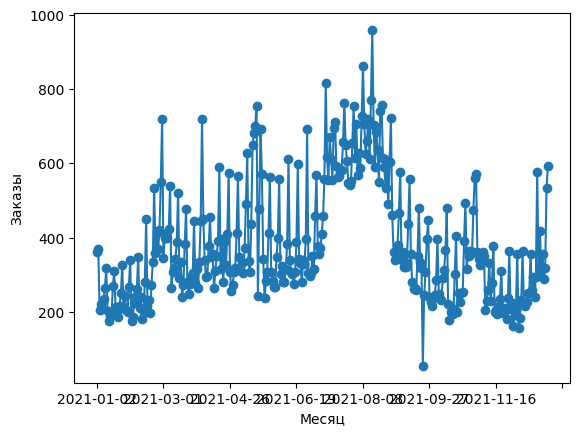

In [163]:
# from 0 to 132027
data[data.index <= 132027].groupby('date')['order_ID'].count().plot(kind='line', marker='o', xlabel='Месяц', ylabel='Заказы')

<AxesSubplot: xlabel='Месяц', ylabel='Средний чек'>

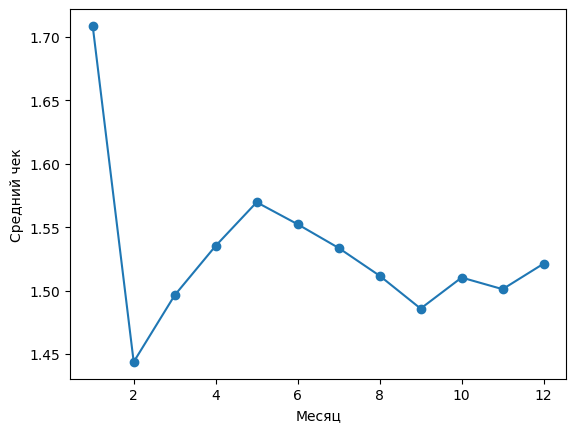

In [143]:
# получить информацию по среднему чеку и самому популярному продукту в каждом месяце
data[data.index <= 132027].groupby('month')['unit_price'].mean().plot(kind='line', marker='o', xlabel='Месяц', ylabel='Средний чек')

In [147]:
 # получить информацию по самому популярному продукту в каждом месяце
data[data.index <= 132027].groupby('month')['product'].agg(lambda x: x.value_counts().index)

month
1     [TRADITIONAL BAGUETTE, COUPE, BAGUETTE, BANETT...
2     [TRADITIONAL BAGUETTE, COUPE, BAGUETTE, BANETT...
3     [TRADITIONAL BAGUETTE, COUPE, BAGUETTE, BANETT...
4     [TRADITIONAL BAGUETTE, COUPE, BANETTE, BAGUETT...
5     [TRADITIONAL BAGUETTE, COUPE, BANETTE, BAGUETT...
6     [TRADITIONAL BAGUETTE, COUPE, BAGUETTE, BANETT...
7     [TRADITIONAL BAGUETTE, COUPE, BANETTE, BAGUETT...
8     [TRADITIONAL BAGUETTE, COUPE, BAGUETTE, BANETT...
9     [TRADITIONAL BAGUETTE, COUPE, BAGUETTE, BANETT...
10    [TRADITIONAL BAGUETTE, COUPE, BAGUETTE, BANETT...
11    [TRADITIONAL BAGUETTE, COUPE, BANETTE, BAGUETT...
12    [TRADITIONAL BAGUETTE, COUPE, BAGUETTE, BANETT...
Name: product, dtype: object

C:\Users\yaroslav\AppData\Local\Temp\ipykernel_5492\3858241819.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data[data.index <= 132027].groupby('month')['order_ID', 'quantity'].apply(lambda x: x.groupby('order_ID')['quantity'].sum().mean()).plot(kind='line', marker='o', xlabel='Месяц', ylabel='Среднее количество продуктов в заказе')


<AxesSubplot: xlabel='Месяц', ylabel='Среднее количество продуктов в заказе'>

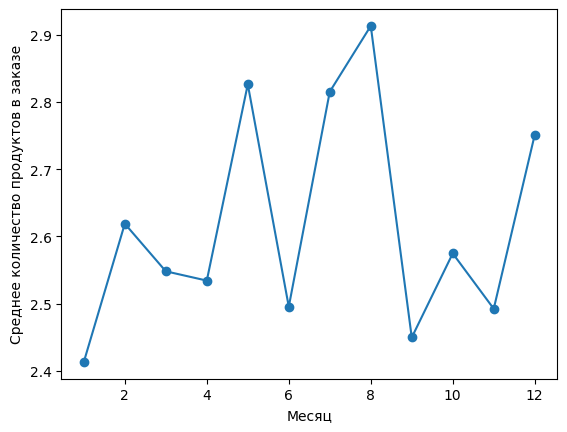

In [162]:
# group ny month, for each group group by order_ID and sum quantity
data[data.index <= 132027].groupby('month')['order_ID', 'quantity'].apply(lambda x: x.groupby('order_ID')['quantity'].sum().mean()).plot(kind='line', marker='o', xlabel='Месяц', ylabel='Среднее количество продуктов в заказе')